In [5]:
!pip install MiniSom

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
dataset = pd.read_csv('/content/Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
dataset

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [8]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

In [9]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len=15, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

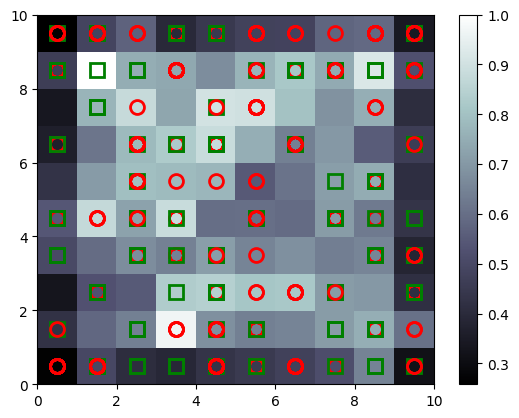

In [10]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o','s']
colors = ['r', 'g']
for i, x in enumerate(X):
  w = som.winner(x)
  plot(w[0] + 0.5,
       w[1] + 0.5,
       markers[y[i]],
       markeredgecolor = colors[y[i]],
       markerfacecolor = 'None',
       markersize = 10,
       markeredgewidth = 2)
show()

In [11]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(6,8)], mappings[(5,1)]), axis = 0)
frauds = sc.inverse_transform(frauds)

In [12]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15766183
15590434
15772329
15734649
15646082
15717629
15604536
15635598
15647191
15623369
15650591
15633608
15684722
15609823
15594133
15706268
15653147
15735572
15687765
15658504
15569595


In [13]:
customers = dataset.iloc[:, 1:].values

In [15]:
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
  if dataset.iloc[i, 0] in frauds:
    is_fraud[i] = 1

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

In [17]:
import tensorflow as tf
tf.__version__

'2.19.0'

In [18]:
ann = tf.keras.models.Sequential()

In [19]:
ann.add(tf.keras.layers.Dense(units=2, activation='relu'))

In [20]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [21]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [22]:
ann.fit(customers, is_fraud, batch_size = 1, epochs = 100)

Epoch 1/100
690/690 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8447 - loss: 0.5774
Epoch 2/100
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9693 - loss: 0.2901
Epoch 3/100
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9668 - loss: 0.1977
Epoch 4/100
690/690 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9654 - loss: 0.1462
Epoch 5/100
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9816 - loss: 0.0846
Epoch 6/100
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9754 - loss: 0.0843
Epoch 7/100
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9597 - loss: 0.1167
Epoch 8/100
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9731 - loss: 0.0833
Epoch 9/100
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9636 - loss: 0.0881
Epoch 10/100
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9786 - loss: 0.0600
Epoch 11/100
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9709 - loss: 0.0695
Epoch 12/100
690/690 ━━━━━━━━━━━━━━━━━━━━

In [24]:
y_pred = ann.predict(customers)
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:, 1].argsort()]

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  


In [25]:
print(y_pred)

[[1.57901130e+07 2.40061655e-28]
 [1.56214230e+07 3.53168128e-26]
 [1.55837240e+07 3.69689753e-25]
 ...
 [1.57661830e+07 8.30741286e-01]
 [1.56847220e+07 8.30741286e-01]
 [1.57938960e+07 8.30741286e-01]]


In [33]:
new_customer_raw = np.array([[15776156, 22.08, 11.460, 4, 4, 1.585, 0, 0, 0, 1, 2, 100, 1213, 0, 0]])
new_customer = sc.transform(new_customer_raw)
prob = ann.predict(new_customer)[0, 0]
threshold = 0.5
label = int(prob >= threshold)
print(f"Probabilidad de fraude: {prob:.4f}")
print("Clasificación:","FRAUDE" if label==1 else "NO FRAUDE")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Probabilidad de fraude: 0.0000
Clasificación: NO FRAUDE
